<a href="https://colab.research.google.com/github/dheayutari/SVM_Big-Data/blob/main/SVM_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [316]:
import warnings

warnings.filterwarnings('ignore')

In [317]:
data = '/content/pulsar_data_train.csv'
df = pd.read_csv(data)

In [318]:
df.shape

(12528, 9)

In [319]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [320]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [321]:
df.columns = df.columns.str.strip()

In [322]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [323]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [324]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [325]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [326]:
df['target_class'].value_counts()/np.float64(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [328]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [329]:
rata_IPKurtosis = df['IP Kurtosis'].mean()
df['IP Kurtosis'] = df['IP Kurtosis'].fillna(rata_IPKurtosis)
df['IP Kurtosis'].isna().sum()

rata_DMSNRSd = df['DM-SNR Sd'].mean()
df['DM-SNR Sd'] = df['DM-SNR Sd'].fillna(rata_DMSNRSd)
df['DM-SNR Sd'].isna().sum()

rata_DMSNRSkewness = df['DM-SNR Skewness'].mean()
df['DM-SNR Skewness'] = df['DM-SNR Skewness'].fillna(rata_DMSNRSkewness)
df['DM-SNR Skewness'].isna().sum()

0

In [330]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [331]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,0.99,6.21,29.61,18.67,4.54,104.69,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.29,0.20,2.79,19.62,8.45,87.80,0.00
75%,127.11,50.98,0.48,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

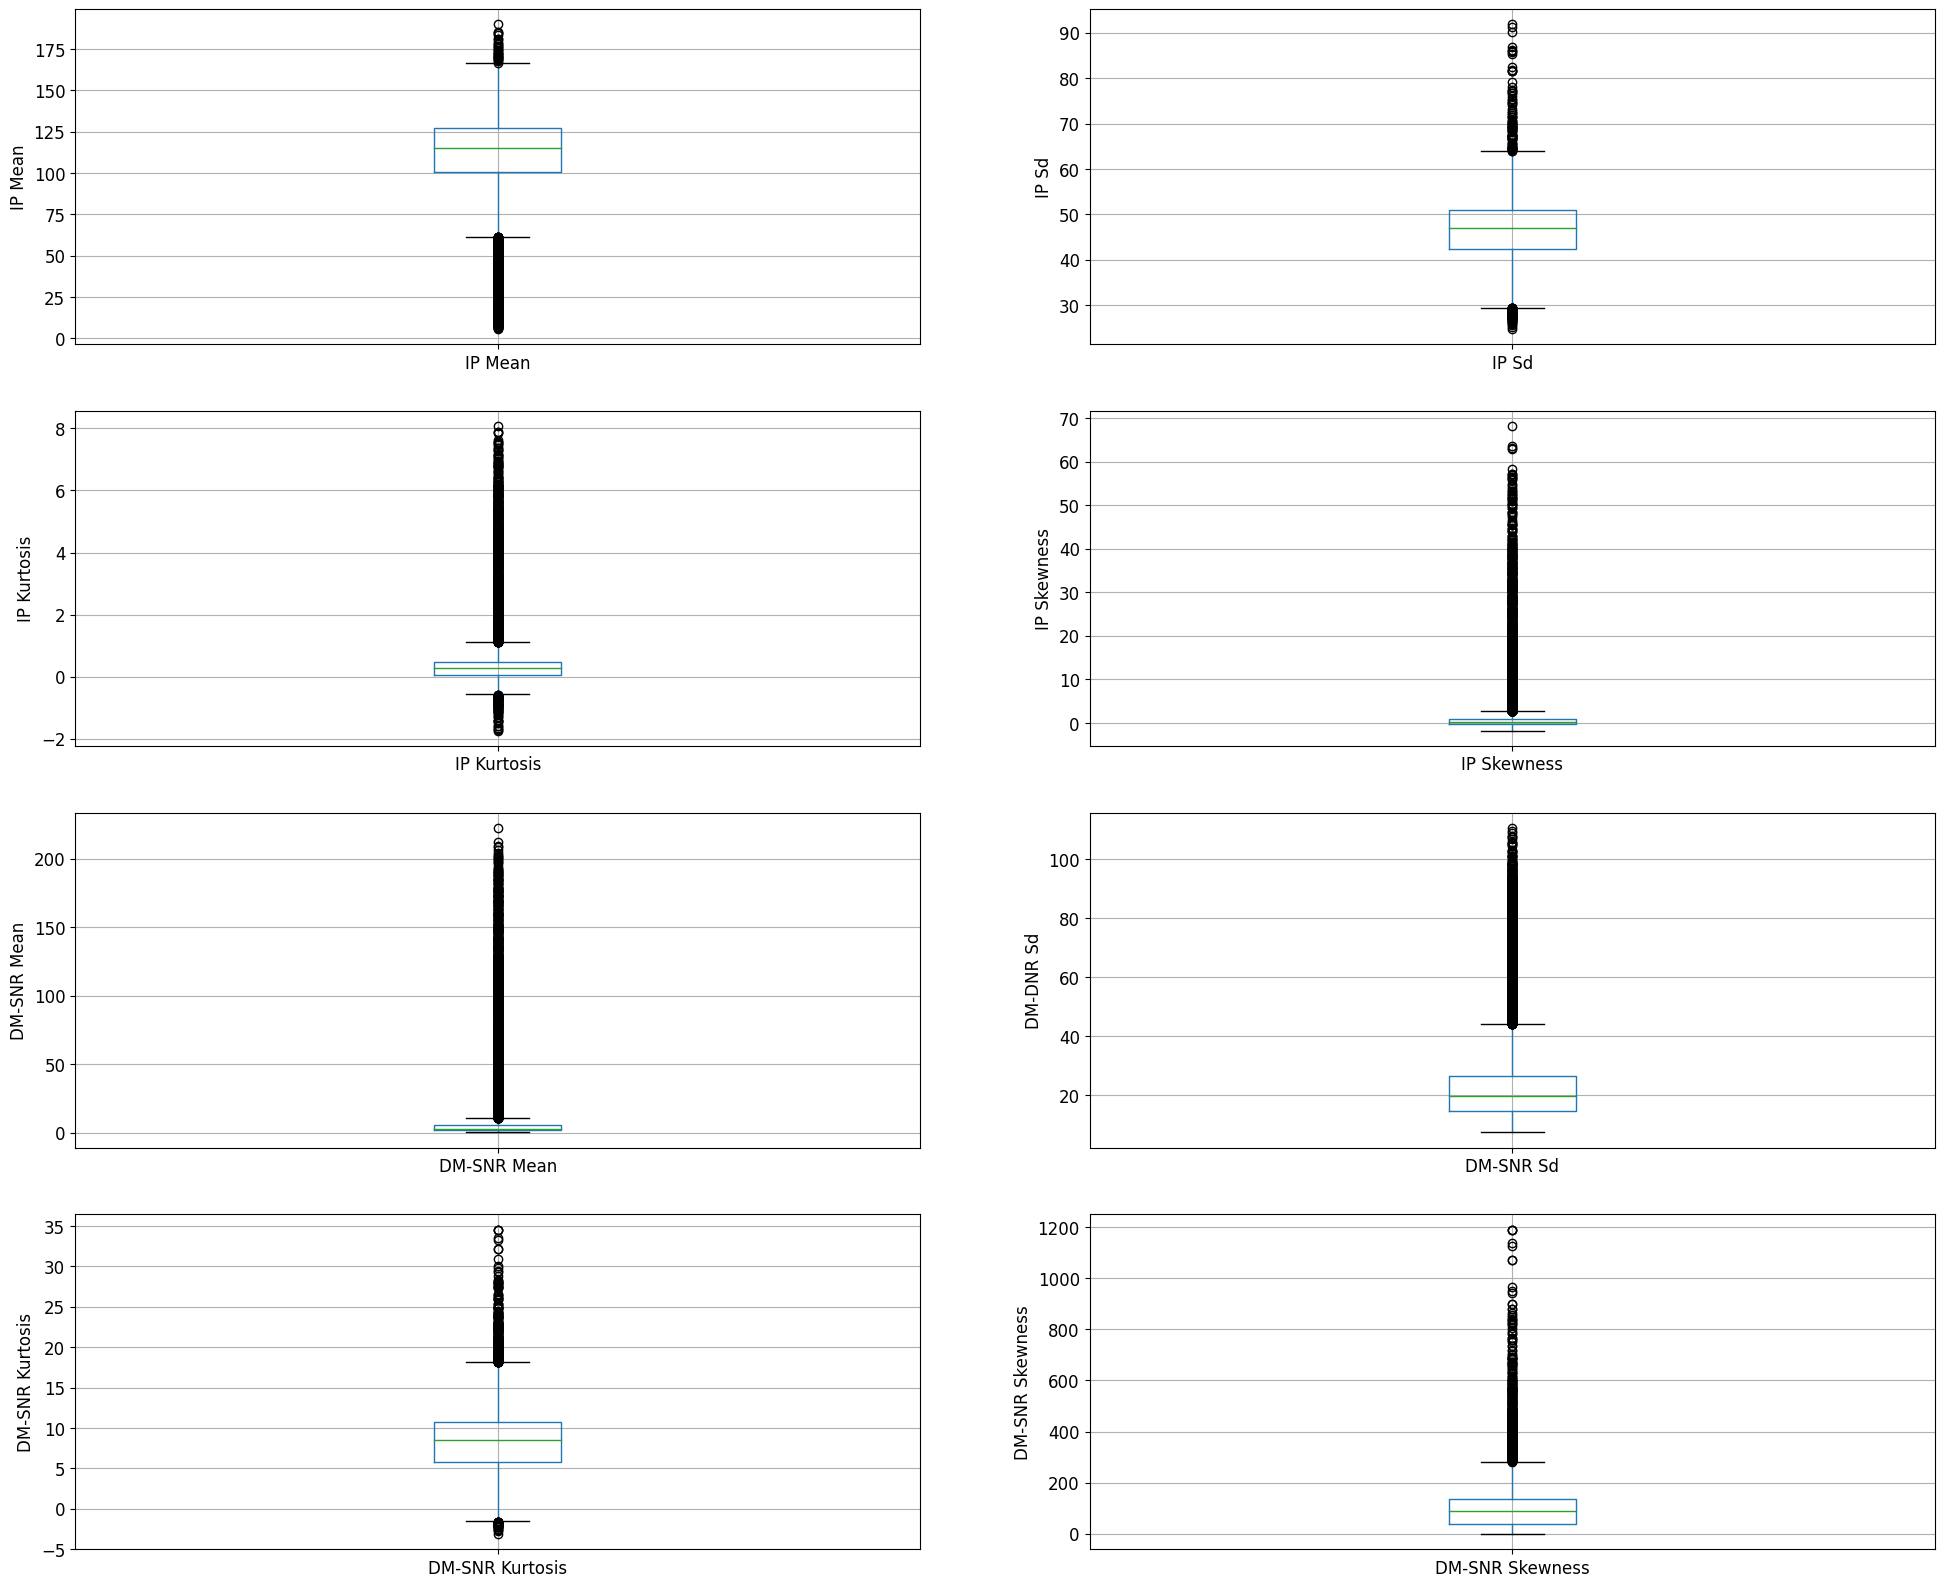

In [332]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-DNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of Pulsar Stars')

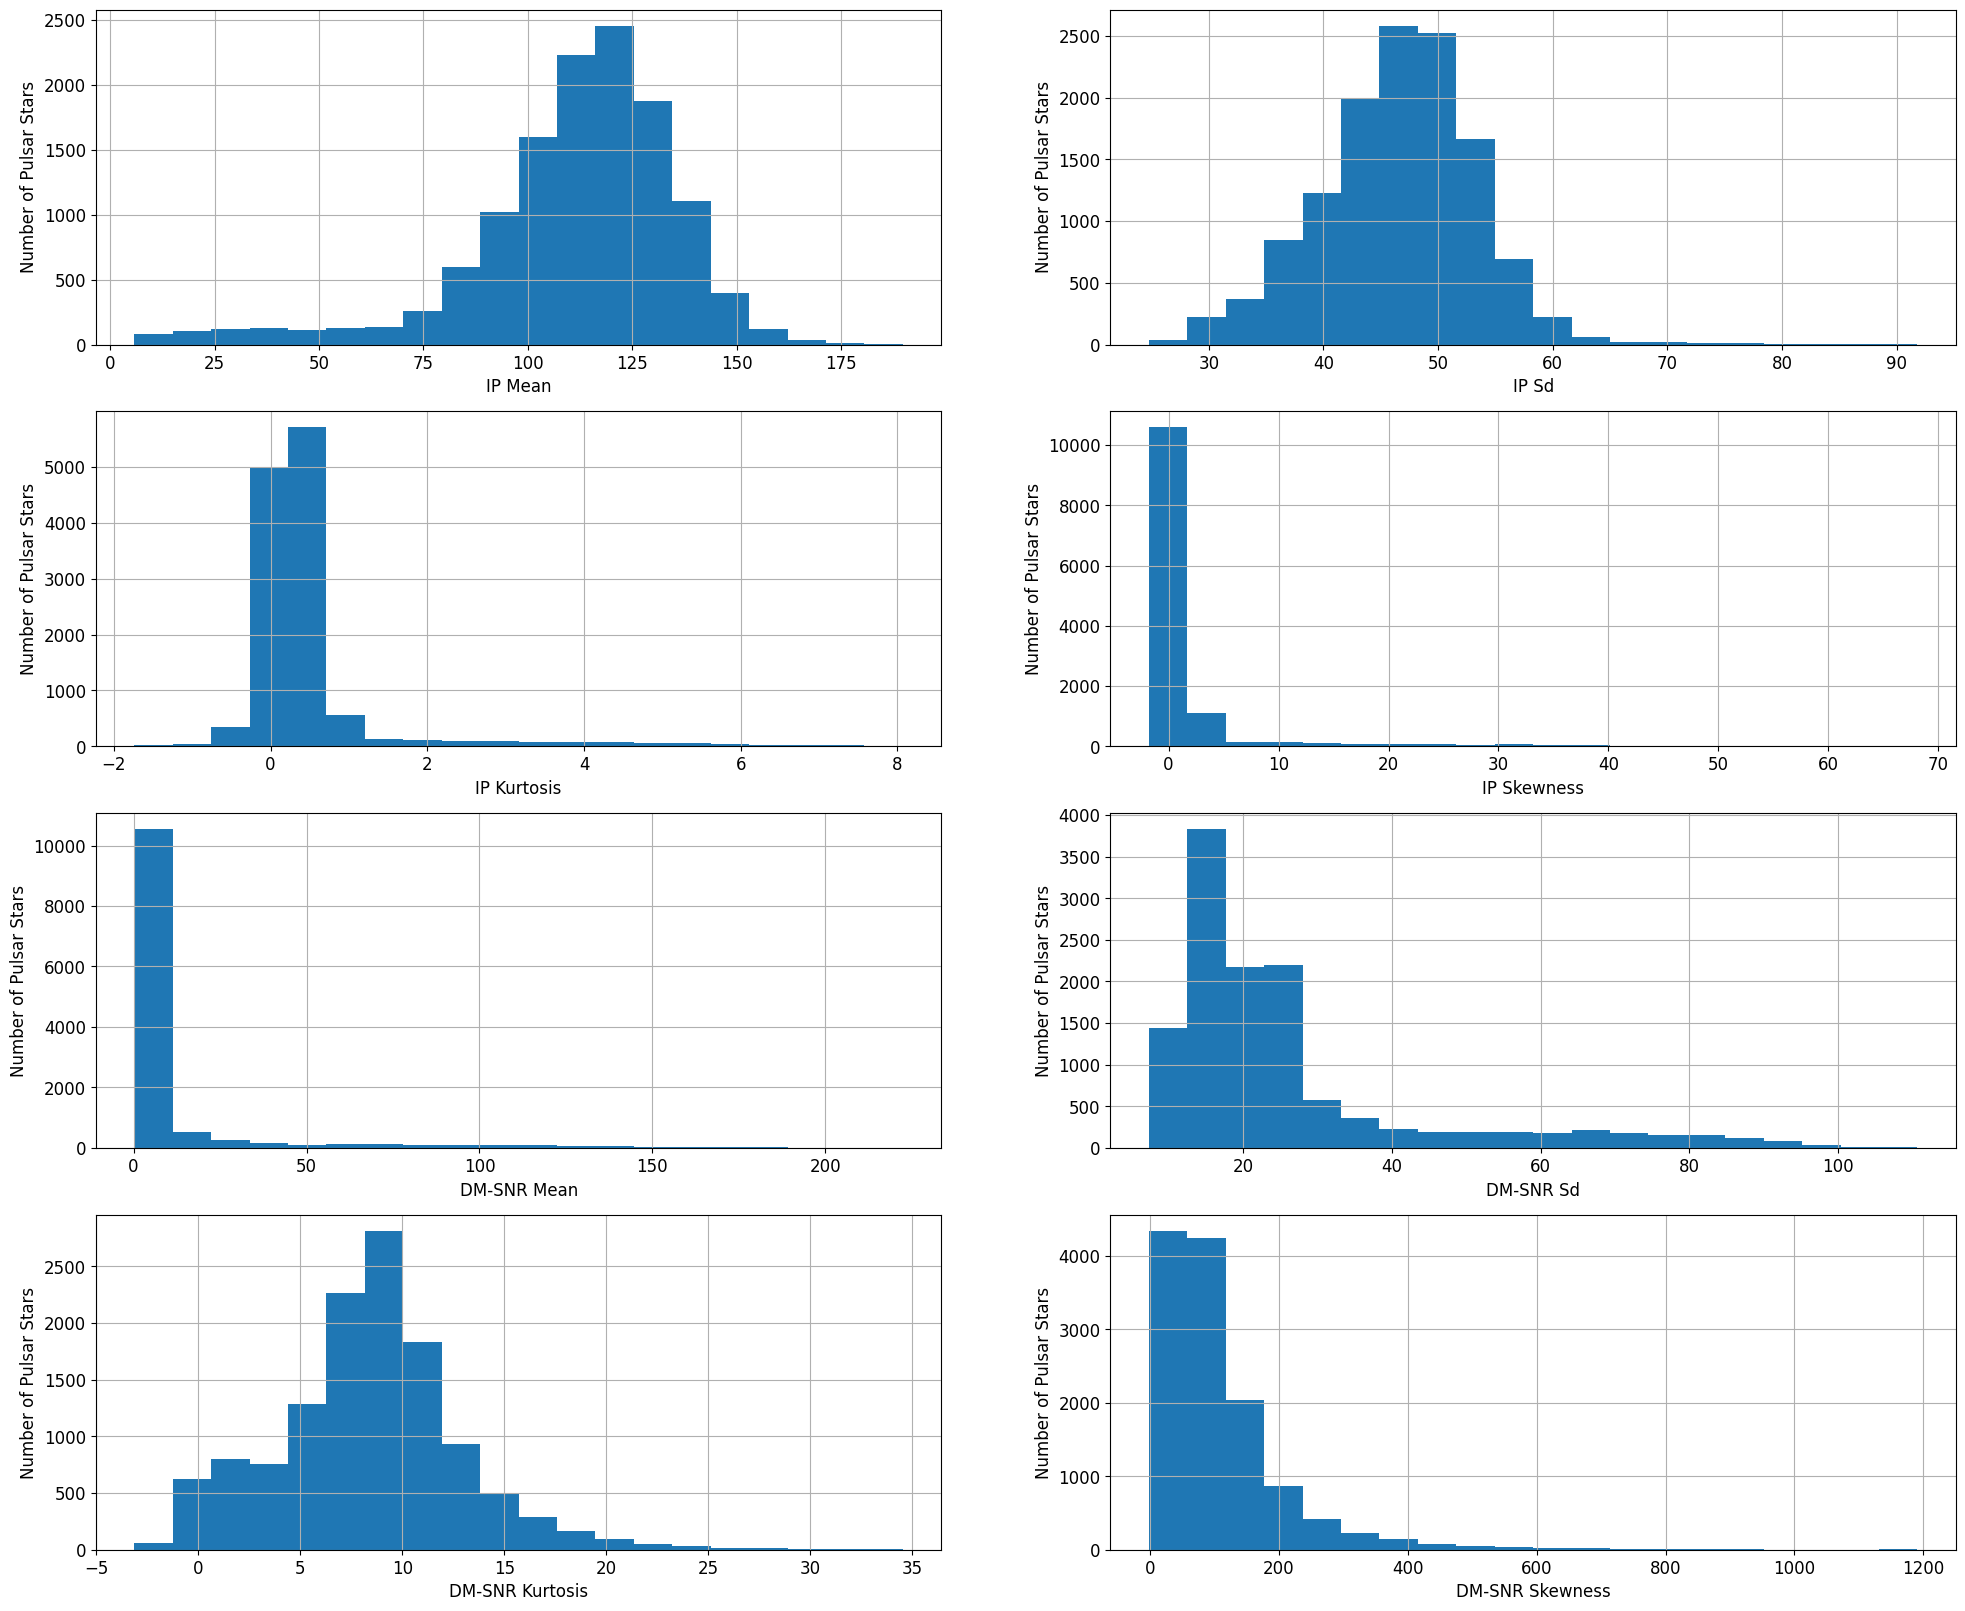

In [333]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of Pulsar Stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of Pulsar Stars')

In [334]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [335]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [336]:
cols = X_train.columns

In [337]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [338]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [339]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [340]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.580698e-16,-7.770453e-16,-9.925762e-18,-1.595212e-17,-3.030902e-17,1.036888e-16,-1.318708e-16,-5.955457e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-1.014727e+00,-2.526379e+00,-1.026846e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-6.205702e-01,-5.589324e-01,-6.456738e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.625238e-01,2.442155e-02,-1.680021e-01
75%,6.265131e-01,6.579129e-01,-6.261144e-03,-1.397269e-01,-2.459675e-01,1.653286e-02,5.276848e-01,2.883008e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.496240e+00,5.769814e+00,1.036456e+01


In [341]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model Accuracy Score with Default Hyperparameters: {0:0.4}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Default Hyperparameters: 0.9796


In [342]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model Accuracy Score with RBF Kernel and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with RBF Kernel and C=100.0: 0.9804


In [343]:
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model Accuracy Score with RBF Kernel and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with RBF Kernel and C=1000.0: 0.9808


In [344]:
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Model Accuracy Score with Linear Kernel and C=1.0: {0:0.4}'. format(accuracy_score(y_test, y_pred_test)))

Model Accuracy Score with Linear Kernel and C=1.0: 0.9777


In [345]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train,y_train)

y_pred_test=linear_svc100.predict(X_test)

print('Model Accuracy Score with Linear Kernel and C=100.0: {0:0.4}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Linear Kernel and C=100.0: 0.9808


In [346]:
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train,y_train)

y_pred_test=linear_svc1000.predict(X_test)

print('Model Accuracy Score with Linear Kernel and C=1000.0: {0:0.4}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Linear Kernel and C=1000.0: 0.9808


In [347]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0., 0., 0., ..., 1., 0., 0.])

In [348]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9756


In [349]:
print('Training Set Score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test Set Score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training Set Score: 0.9756
Test Set Score: 0.9777


In [350]:
y_test.value_counts()

0.0    2285
1.0     221
Name: target_class, dtype: int64

In [351]:
null_accuracy = (2285/(2285+221))

print('Null Accuracy Score: {0:0.4f}'. format(null_accuracy))

Null Accuracy Score: 0.9118


In [352]:
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)

y_pred=poly_svc.predict(X_test)

print('Model Accuracy Score with Polynomial Kernel and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Polynomial Kernel and C=1.0: 0.9749


In [353]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train,y_train)

y_pred=poly_svc100.predict(X_test)

print('Model Accuracy Score with Polynomial Kernel and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Polynomial Kernel and C=100.0: 0.9792


In [354]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)

y_pred=sigmoid_svc.predict(X_test)

print('Model Accuracy Score with Sigmoid Kernel and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Sigmoid Kernel and C=1.0: 0.8767


In [355]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)

y_pred=sigmoid_svc100.predict(X_test)

print('Model Accuracy Score with Sigmoid Kernel and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model Accuracy Score with Sigmoid Kernel and C=100.0: 0.8767


In [356]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[2276    9]
 [  47  174]]

True Positives(TP) =  2276

True Negatives(TN) =  174

False Positives(FP) =  9

False Negatives(FN) =  47


<Axes: >

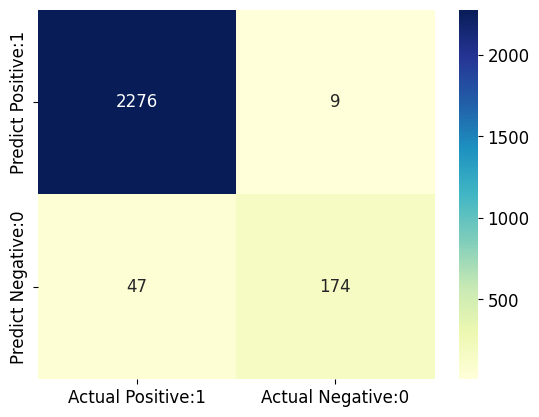

In [357]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [358]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.79      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [359]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [360]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification Accuracy: {0:0.4f}'. format(classification_accuracy))

Classification Accuracy: 0.9777


In [361]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification Error: {0:0.4f}'. format(classification_error))

Classification Error: 0.0223


In [362]:
precision = TP / float(TP + FP)

print('Precision: {0:0.4f}'. format(precision))

Precision: 0.9961


In [363]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity: {0:0.4f}'. format(recall))

Recall or Sensitivity: 0.9798


In [364]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate: {0:0.4f}'. format(true_positive_rate))

True Positive Rate: 0.9798


In [365]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate: {0:0.4f}'. format(false_positive_rate))

False Positive Rate: 0.0492


In [366]:
specificity = TN / (TN + FP)

print('Specificity: {0:0.4f}'. format(specificity))

Specificity: 0.9508


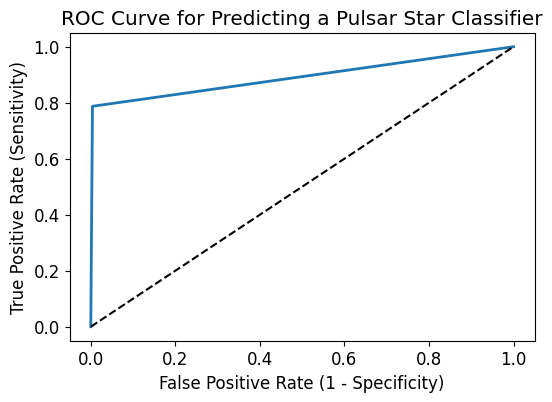

In [367]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC Curve for Predicting a Pulsar Star Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [368]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC: {:.4f}'.format(ROC_AUC))

ROC AUC: 0.8917


In [369]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross Validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross Validated ROC AUC : 0.9686


In [370]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [371]:
print('Stratified Cross-Validation Scores with Linear Kernel:\n\n{}'.format(linear_scores))

Stratified Cross-Validation Scores with Linear Kernel:

[0.97765363 0.97805267 0.97605746 0.9748503  0.97644711]


In [372]:
print('Average Stratified Cross-Validation Score with Linear Kernel:{:.4f}'.format(linear_scores.mean()))

Average Stratified Cross-Validation Score with Linear Kernel:0.9766


In [373]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [374]:
print('Stratified Cross-Validation Scores with RBF Kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-Validation Scores with RBF Kernel:

[0.97326417 0.97286512 0.9688747  0.97205589 0.96886228]


In [375]:
print('Average Stratified Cross-Validation Score with RBF Kernel:{:.4f}'.format(rbf_scores.mean()))

Average Stratified Cross-Validation Score with RBF Kernel:0.9712


In [376]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [377]:
print('GridSearch CV Best Score: {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters That Give the Best Results:','\n\n', (grid_search.best_params_))

print('\n\nEstimator That was Chosen by the Search:','\n\n', (grid_search.best_estimator_))

GridSearch CV Best Score: 0.9786


Parameters That Give the Best Results: 

 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator That was Chosen by the Search: 

 SVC(C=10, gamma=0.2)


In [378]:
print('GridSearch CV Score on Test Set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV Score on Test Set: 0.9804
